# Imports

In [ ]:
!gdown 1gyf1TiDGxrDoIBEvptPbSY3CVIG-KneZ -O dataset.zip
!unzip -o dataset.zip
!rm dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1gyf1TiDGxrDoIBEvptPbSY3CVIG-KneZ
To: /content/dataset.zip
100% 9.72M/9.72M [00:00<00:00, 217MB/s]
Archive:  dataset.zip
  inflating: Dataset/Caption 2.0.xlsx  
  inflating: Dataset/image_res/0001.jpg  
  inflating: Dataset/image_res/0002.jpg  
  inflating: Dataset/image_res/0003.jpg  
  inflating: Dataset/image_res/0004.jpg  
  inflating: Dataset/image_res/0005.jpg  
  inflating: Dataset/image_res/0006.jpg  
  inflating: Dataset/image_res/0007.jpg  
  inflating: Dataset/image_res/0008.jpg  
  inflating: Dataset/image_res/0009.jpg  
  inflating: Dataset/image_res/0010.jpg  
  inflating: Dataset/image_res/0011.jpg  
  inflating: Dataset/image_res/0012.jpg  
  inflating: Dataset/image_res/0013.jpg  
  inflating: Dataset/image_res/0014.jpg  
  inflating: Dataset/image_res/0015.jpg  
  inflating: Dataset/image_res/0016.jpg  
  inflating: Dataset/image_res/0017.jpg  
  inflating: Dataset/image_res/0018.jpg  
  inflating: Dataset/image_res/

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sn
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.layers import  LSTM, Embedding, Dropout, Activation, Conv1D, GRU, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, TimeDistributed
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D,SpatialDropout1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from sklearn.metrics import classification_report
import pandas as pd
from pandas import ExcelWriter
from keras.preprocessing.sequence import pad_sequences
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import accuracy_score
import numpy as np
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.layers import Conv1D
import seaborn as sn
from keras.layers import add
from keras.layers import  Activation, Add, Dropout

from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
import PIL
from numpy import *
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from keras.layers import Concatenate
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Preprocess text

Open

In [ ]:
File = pd.read_excel ('Dataset/Caption 2.0.xlsx', sheet_name='Sheet1')
data = pd.DataFrame(File, columns= ['caption', 'lable'])

caption = data['caption'].values.tolist()
print(caption)
label = data['lable'].values.tolist()
stopword_list=[]

['سلام سلام عزیزای دلم... امیدوارم احوالتون عالی باشه.. روز عشق رو به همتون تبریک میگم و امیدوارم که  عشق تو زندگی همتون جاری باشه.اینم قلب سوپرایز من که برای دختر گلم درست کردم و خیلی خوشش اومد و سوپرایز شد. برای درست کردن این قلب، من از قالب قلب سیلیکون استفاده کردم، که توی عکسِ اسلایدهای بعدی مشخصه... 280 گرم شکلات تخته ای شیری رو بن ماری کردم روی بخار آب و و بهش رنگ پودری قرمز زدم. میشه شکلات رو هم رنگی بخرید که در رنگهای مختلف موجوده و نیازی هم نیست که بخواین رنگش کنید، ولی من دیگه شکلات شیری تو خونه داشتم و همونو استفاده کردم، قالب رو کمی چرب کردم و شکلات ذوب شده رو داخلش چرخوندم تا به همه جای قالب برسه، حتی دیوارش.  به هیچ وجه نباید یک قطره آب داخل شکلات بره یا حتی بخار آب، چون سفت و خرابش میکنه. و شکلات که به همه جای قالب رسید، اضافش رو خالی کردم و قالب رو ده دقیقه الی یک ربع گذاشتم یخچال و بعد به همین صورت کارم رو تکرار کردم، این دفعه با قلم موی  سیلیکون شکلات به همه جای قالب زدم و مجددا گذاشتم یخچال. من این کار رو دو بار انجام دادم چون شکلاتم کم بود، ولی اگر سه بار شکلات به ق

Split data by index

In [ ]:
data_index = [] # a help list for split & handle data (Image & Text)
for i in range(len(label)):
  data_index.append(i)
print("Indexes of Data = ", data_index)

X_train_index, X_test_index, Y_train, Y_test = train_test_split(data_index, label,
                                                                            test_size = 0.1,  stratify= label,
                                                                            random_state = 2018)
X_train_index, X_val_index, Y_train, Y_val = train_test_split(X_train_index, Y_train,
                                                              test_size = 0.2,  stratify= Y_train,
                                                              random_state = 2018)

print("Indexes of X_test = ", X_test_index)
print("Indexes of X_train = ", X_train_index)
print("Indexes of X_val = ", X_val_index)
print("# of Data = ", len(label))
print("# of test = ", len(Y_test))
print("# of train = ", len(Y_train))
print("# of val = ", len(Y_val))

Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)

Indexes of Data =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

Text

In [ ]:
dictionary = []
list = []
# old dataset
for i in caption:
    for stopword in stopword_list:
      i = i.replace(str(stopword), '')
    i = i.replace('.', '')  #erase .
    i = i.replace('"', '')  #erase "
    i = i.replace(':', '')  #erase :
    i = i.replace('(', '')  #erase (
    i = i.replace(')', '')  #erase )
    i = i.replace(',', '')  #erase ,
    i = i.replace('،', '')  #erase ،
    i = i.replace('!', '')  #erase !
    i = i.replace('-', '')  #erase -
    i = i.replace('_', '')  #erase _
    i = i.replace('؟', '')  #erase ؟
    i = i.replace('?', '')  #erase ?
    i = i.replace('\u200c', '')  #erase \u200c
    i = i.replace('\u200f', '')  #erase \u200f
    i = i.replace('؛', '')  #erase ؛
    #i = i.replace('\n', '')  #erase \n

    temp = i.split()
    #print(temp[0].tolist())
    for j in temp:      #create dictionary
        if j not in dictionary:
            dictionary.append(j)
    #print(dictionary[0].tolist())
    ind = []
    for j in temp:
        ind.append(dictionary.index(j))
    list.append(ind)

print(list[0])
d10 = 0
d10_20 = 0
d20_30 = 0
d30_40 = 0
d40_50 = 0
d50 = 0
sum_len = 0
for i in list:
  temp = len(i)
  sum_len += temp
  if temp<=10:
    d10 += 1
  elif temp>10 and temp<=20:
    d10_20 += 1
  elif temp>20 and temp<=30:
    d20_30 += 1
  elif temp>30 and temp<=40:
    d30_40 += 1
  elif temp>40 and temp<=50:
    d40_50 += 1
  elif temp>50:
    d50 += 1
print ("0-10: ",d10,"\n10-20: ",d10_20,"\n20-30: ",d20_30,"\n30-40: ",d30_40,"\n40-50: ",d40_50,"\n50+: ",d50)
avg = sum_len/len(list)
print ("avg: ",avg)

Caption = pad_sequences(list, maxlen=20, padding='post')
print(len(dictionary))
print(Caption)
Caption = Caption.tolist()
print(Caption)


[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 3, 15, 8, 16, 17, 11, 18, 19, 20, 21, 22, 15, 23, 24, 25, 26, 27, 14, 28, 29, 30, 14, 21, 31, 23, 26, 32, 33, 20, 22, 34, 35, 20, 36, 37, 27, 15, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 9, 49, 50, 27, 51, 52, 53, 14, 14, 54, 55, 56, 57, 58, 59, 45, 9, 60, 61, 62, 15, 63, 64, 65, 66, 14, 67, 60, 68, 15, 69, 70, 71, 72, 22, 73, 45, 48, 16, 74, 75, 14, 76, 37, 27, 35, 9, 77, 78, 27, 14, 45, 79, 80, 9, 81, 82, 83, 10, 84, 85, 35, 86, 87, 88, 10, 89, 90, 91, 92, 93, 53, 94, 45, 95, 96, 87, 52, 53, 97, 98, 14, 99, 100, 14, 45, 15, 10, 84, 85, 35, 101, 102, 9, 103, 27, 14, 35, 9, 104, 105, 106, 92, 107, 108, 109, 14, 110, 10, 111, 112, 113, 9, 114, 27, 33, 115, 116, 117, 118, 36, 45, 10, 84, 85, 35, 58, 14, 119, 108, 109, 22, 33, 120, 9, 121, 122, 123, 124, 97, 125, 126, 127, 72, 128, 129, 122, 45, 10, 35, 130, 131, 59, 132, 133, 134, 127, 97, 135, 136, 122, 54, 137, 138, 83, 139, 110, 34, 140, 98, 141, 45, 142, 34, 35, 143, 27, 14, 81

In [ ]:
X_test_Text = []
X_train_Text = []
X_val_Text = []

for i in X_test_index:
  X_test_Text.append(Caption[i])
for i in X_train_index:
  X_train_Text.append(Caption[i])
for i in X_val_index:
  X_val_Text.append(Caption[i])

#print(np.array(Caption))
X_test_Text = np.array(X_test_Text)
X_train_Text = np.array(X_train_Text)
X_val_Text = np.array(X_val_Text)

print("#Data of X_test = ", len(X_test_Text))
print("Data of X_train = ", X_train_Text)
print("Data of X_val = ", X_val_Text)
print("# Test:", len(Y_test))
print("# Train:", len(Y_train))
print("# Val:", len(Y_val))

#Data of X_test =  100
Data of X_train =  [[3366  134 1579 ... 3368  134 1191]
 [ 854 2908   14 ...   34 4264  222]
 [4829 5371 1414 ...    0    0    0]
 ...
 [ 233  238    7 ... 1312   14 1313]
 [3215  262  754 ... 3219 3220 3221]
 [  53 3832  230 ...    0    0    0]]
Data of X_val =  [[ 496 1653  582 ...    0    0    0]
 [  10 1628 1629 ... 1633 1634   80]
 [  34 5612 1281 ...    0    0    0]
 ...
 [2840   10 2841 ...    0    0    0]
 [  14  789  684 ...    0    0    0]
 [2412   34  473 ...   16 2413    6]]
# Test: 100
# Train: 720
# Val: 180


# Preprocess image

Image

In [ ]:
img_rows, img_cols =224, 224
from keras.applications.vgg16 import preprocess_input
path3 = "Dataset/image_res"

imlist = sorted(os.listdir(path3))

In [ ]:
from keras.preprocessing import image
from sklearn import preprocessing
#from keras.utils import to_categorical
image_len = len(imlist)
all_images = np.empty([image_len, img_rows, img_cols, 3])
print(all_images[0])
for i in range(image_len):
  img = image.load_img(path3 + '//'+imlist[i], target_size=(img_rows, img_cols))
  img = image.img_to_array(img)
  #print(img)
  img = np.expand_dims(img, axis=0)
  #print(img)
  img = preprocess_input(img)
  all_images[i, :, :, :] = img
le = preprocessing.LabelEncoder()
y=le.fit_transform(Y_train)
Y_train=np.asarray(y)
#Y_train = to_categorical(y, num_classes=2)
#print(Y_train)

le2 = preprocessing.LabelEncoder()
y_2=le2.fit_transform(Y_test)
Y_test=np.asarray(y_2)
#Y_test = to_categorical(y_2, num_classes=2)
#print(Y_test)

le3 = preprocessing.LabelEncoder()
y_3=le3.fit_transform(Y_val)
Y_val=np.asarray(y_3)
#Y_val = to_categorical(y_3, num_classes=2)


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
from keras.applications.vgg16 import preprocess_input
batch_size =32
nb_classes = 2
nb_epoch = 20

nb_filters = 32
nb_pool = 2
nb_conv = 3

X_test_image = []
X_train_image = []
X_val_image = []
for i in X_test_index:
  X_test_image.append(all_images[i])
for i in X_train_index:
  X_train_image.append(all_images[i])

for i in X_val_index:
  X_val_image.append(all_images[i])

X_test_im = np.expand_dims(X_test_image, axis=0)
X_test_im = preprocess_input(X_test_im, data_format=None)
X_test_image=X_test_im[0]

X_train_im = np.expand_dims(X_train_image, axis=0)
X_train_im = preprocess_input(X_train_im, data_format=None)
X_train_image=X_train_im[0]
X_val_im = np.expand_dims(X_val_image, axis=0)
X_val_im = preprocess_input(X_val_im, data_format=None)
X_val_image=X_val_im[0]
i = 1

# Text Models

In [ ]:
# Parameters

MAX_SEQUENCE_LENGTH = 20
MAX_NB_WORDS = 4000
EMBEDDING_DIM = 10
nb_words  = min(MAX_NB_WORDS, len(dictionary))
lstm_out = MAX_SEQUENCE_LENGTH

In [ ]:
#Bi-Lstm
input = Input(shape=(20,))
text_net_Bi_lstm=Embedding(nb_words,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH)(input)
text_net_Bi_lstm=Bidirectional(LSTM(10))(text_net_Bi_lstm)
text_net_Bi_lstm = Dense(1000, activation='relu')(text_net_Bi_lstm)
text_net_Bi_lstm = BatchNormalization()(text_net_Bi_lstm)

# Image Models

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights='imagenet')
fc2 = vgg16.get_layer('fc2').output
Prediction = Dense(1000, activation='relu')(fc2)
Prediction = BatchNormalization()(Prediction)

553467096/553467096 [==============================] - 6s 0us/step


In [ ]:
!pip install visualkeras
import visualkeras

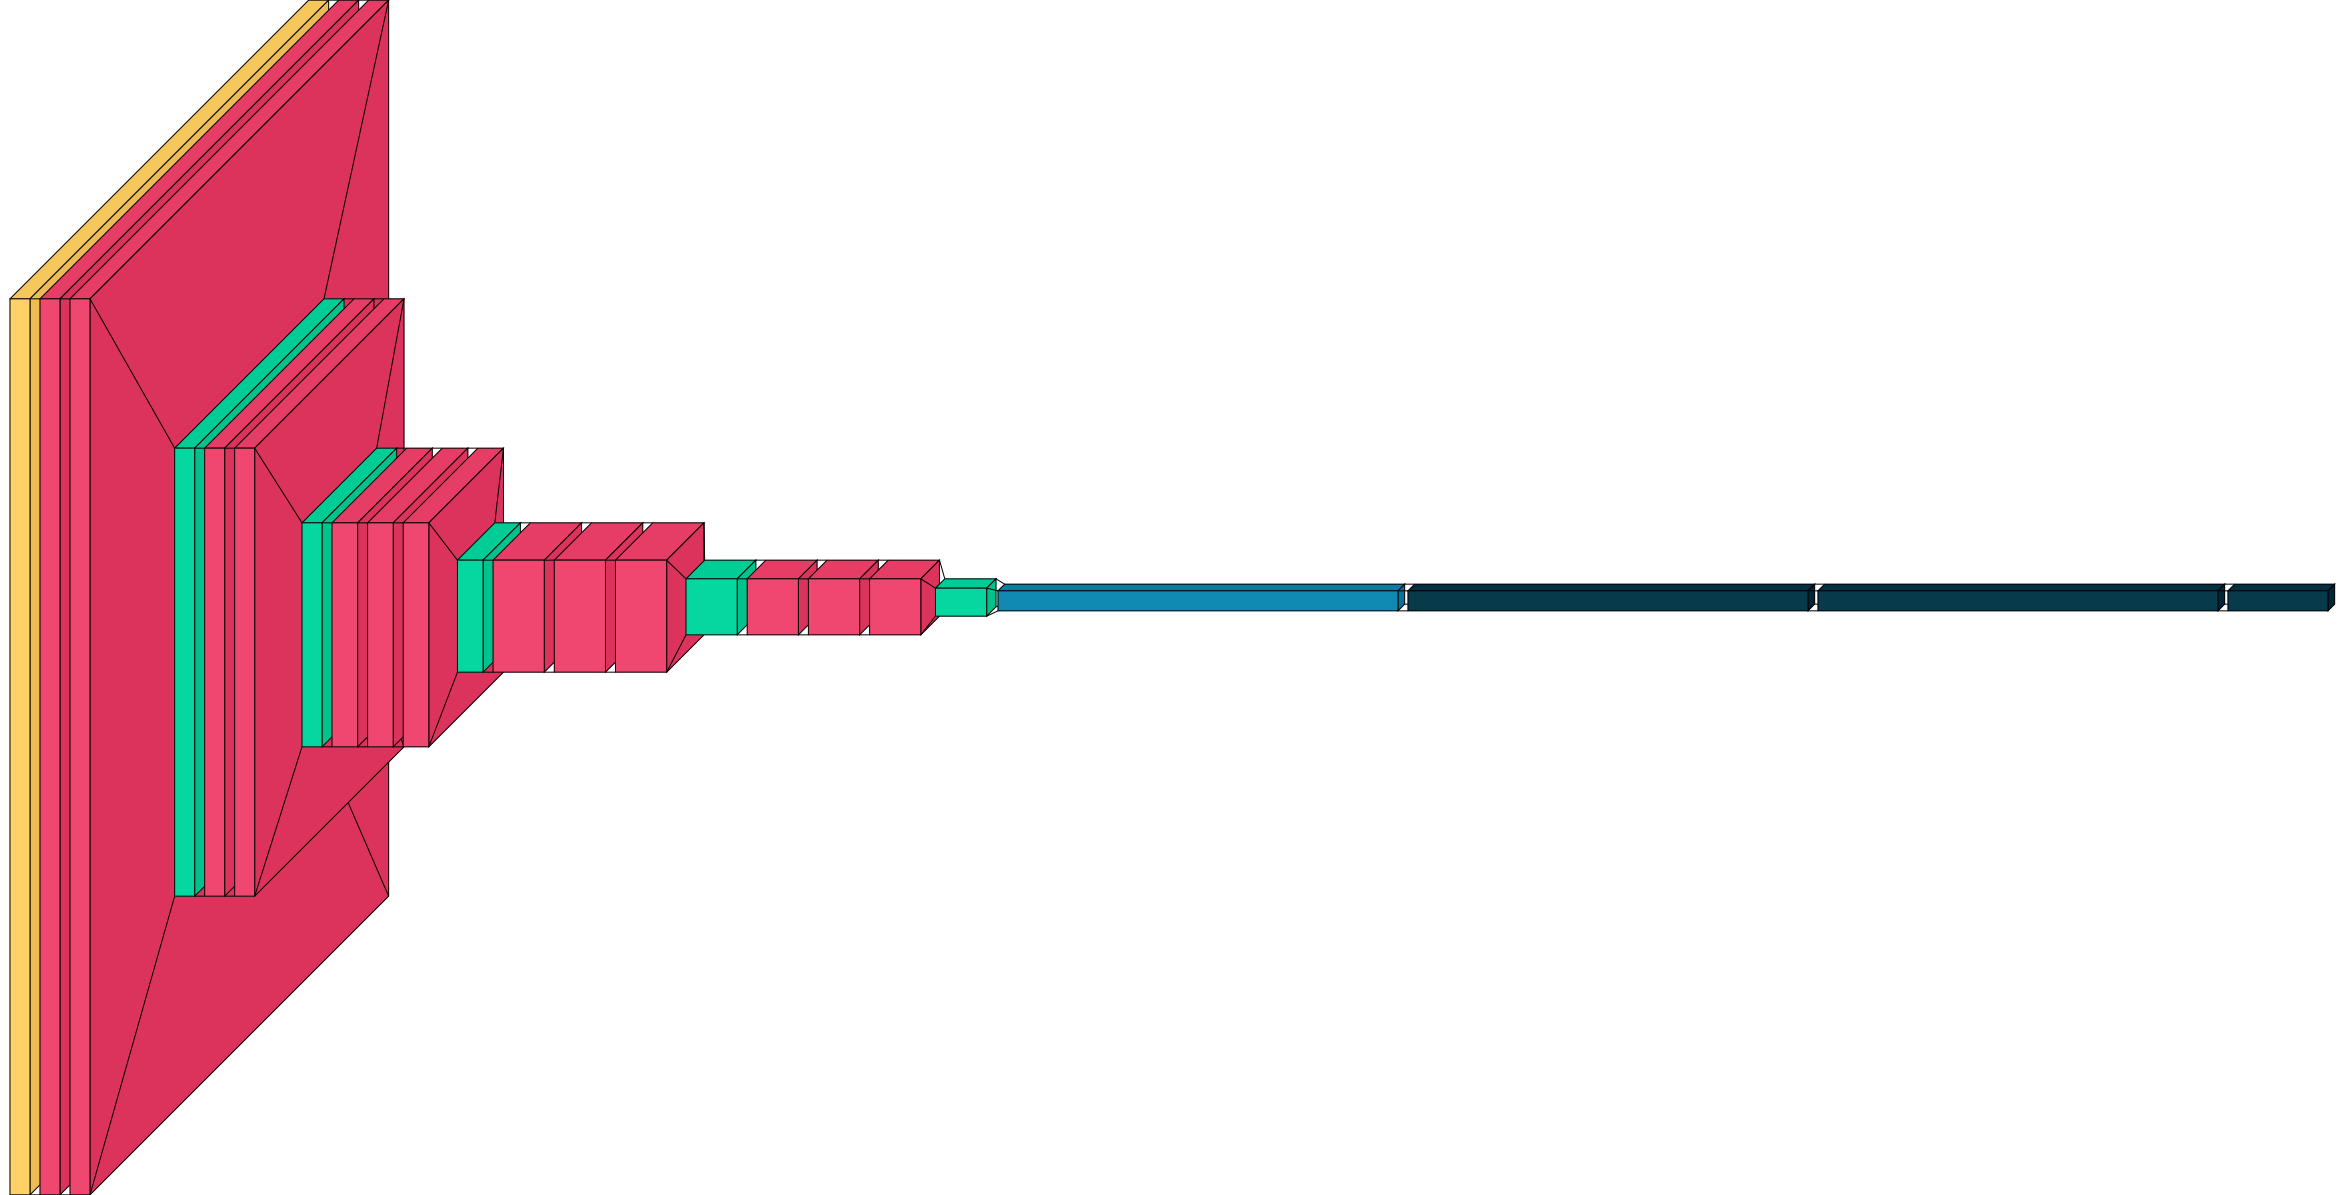

In [ ]:
visualkeras.layered_view(vgg16).show() # display using your system viewer
visualkeras.layered_view(vgg16, to_file='vgg16.png') # write to disk
visualkeras.layered_view(vgg16, to_file='vgg16.png').show() # write and show
visualkeras.layered_view(vgg16)

# Multimodal Model

In [ ]:
#Multimodal model
merged_network = concatenate([Prediction,text_net_Bi_lstm])
merged_network = BatchNormalization()(merged_network)
merged_network = Dropout(0.4)(merged_network)
merged_network = Dense(500, activation='relu')(merged_network)
merged_network = Dropout(0.2)(merged_network)
merged_network = Dense(100, activation='relu')(merged_network)
merged_network = Dropout(0.02)(merged_network)
out = Dense(1, activation='sigmoid')(merged_network)
final_model = Model(inputs=[vgg16.input,input ], outputs=out,)
lr = 0.00001
adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
final_model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                              



 # Train & Test Multimodal

Multimodal

In [ ]:

#Multimodal train
path = '/content/'
history=final_model.fit([X_train_image,X_train_Text], Y_train, epochs=15,
                batch_size=32,verbose=1, validation_data=([X_val_image,X_val_Text], Y_val))

Epoch 1/15
23/23 [==============================] - 70s 2s/step - loss: 0.7076 - accuracy: 0.6611 - val_loss: 558955.9375 - val_accuracy: 0.5722
Epoch 2/15
23/23 [==============================] - 11s 491ms/step - loss: 0.5328 - accuracy: 0.7667 - val_loss: 5038.0679 - val_accuracy: 0.5889
Epoch 3/15
23/23 [==============================] - 12s 513ms/step - loss: 0.3435 - accuracy: 0.8556 - val_loss: 0.4664 - val_accuracy: 0.8222
Epoch 4/15
23/23 [==============================] - 12s 512ms/step - loss: 0.2413 - accuracy: 0.9194 - val_loss: 286.7253 - val_accuracy: 0.8222
Epoch 5/15
23/23 [==============================] - 12s 522ms/step - loss: 0.1599 - accuracy: 0.9375 - val_loss: 0.6976 - val_accuracy: 0.8333
Epoch 6/15
23/23 [==============================] - 12s 512ms/step - loss: 0.0663 - accuracy: 0.9833 - val_loss: 0.4576 - val_accuracy: 0.7722
Epoch 7/15
23/23 [==============================] - 11s 483ms/step - loss: 0.0539 - accuracy: 0.9806 - val_loss: 1.1405 - val_accuracy:

In [ ]:
final_model.evaluate([X_test_image,X_test_Text], Y_test,verbose=1,batch_size=32)
#print("Accuracy of vgg16  and bi-lstm  : %.2f%%" % (scores4[1]*100))

4/4 [==============================] - 2s 698ms/step - loss: 1.0761 - accuracy: 0.6900


[1.0760867595672607, 0.6899999976158142]

In [ ]:

model_1=final_model
p8=model_1.predict([X_test_image,X_test_Text])
Y_pred_multi = []
for p99 in p8:
  if p99 > 0.5:
    Y_pred_multi.append(1)
  else:
    Y_pred_multi.append(0)
print(Y_pred_multi)
#print(p[0])

4/4 [==============================] - 1s 89ms/step
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]


              precision    recall  f1-score   support

    Negative       0.59      0.98      0.74        44
    Positive       0.96      0.46      0.63        56

    accuracy                           0.69       100
   macro avg       0.78      0.72      0.68       100
weighted avg       0.80      0.69      0.67       100



<Axes: >

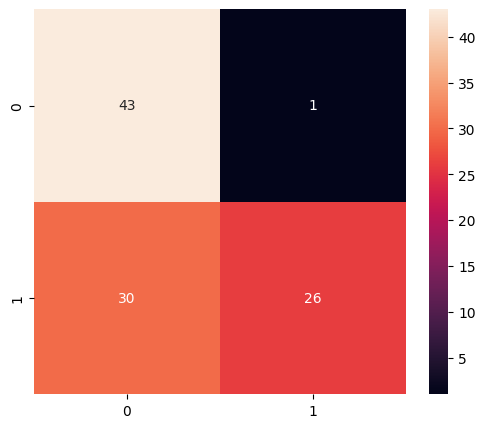

In [ ]:
class_names = ['Negative', 'Positive']
print(classification_report(Y_test, Y_pred_multi, target_names = class_names))
cm = confusion_matrix(Y_test, Y_pred_multi)
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True)

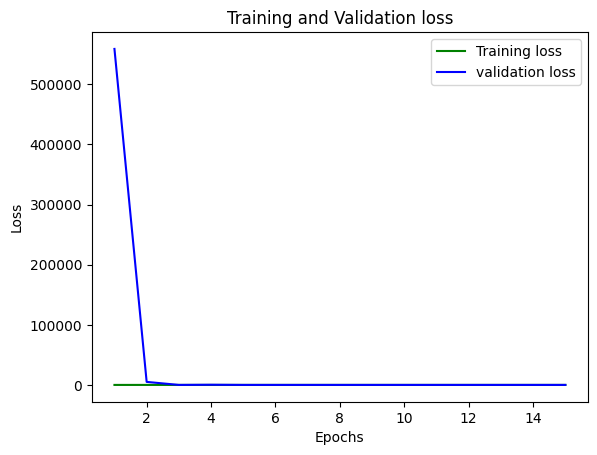

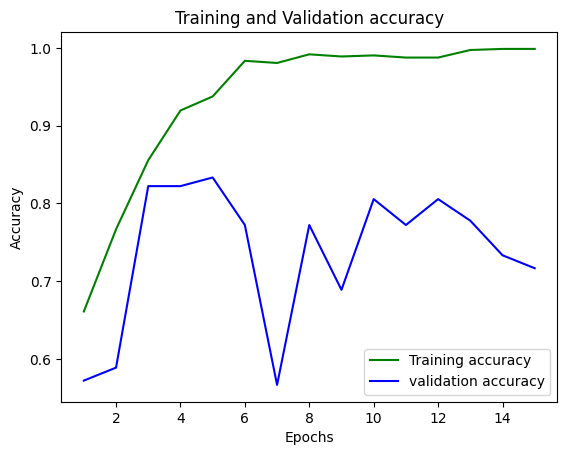

In [ ]:
#loss plot
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#accuracy plot
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()